# Coordenades baricèntriques en quadrilàters



In [13]:
import numpy as np

r1 = 1.0e-14
r2 = 1.0 + 1.0e-14


 ### Posició dels vèrtexs del rectangle $R$:
 $$
 u_{1} = (0, 0),\quad u_{2} = (1, 0),\quad u_{3} = (1, 1),\quad u_{4} = (0, 1)
 $$

In [14]:
# Vèrtexs del rectangle R
u1 = np.array([0, 0])
u2 = np.array([1, 0])
u3 = np.array([1, 1])
u4 = np.array([0,1])

vertexsR = np.array([u1, u2, u3, u4])
vertexsRPlot = np.array([u1, u2, u3, u4, u1])

print('Posició dels vèrtexs del rectangle R:')
print(f'u1 = {vertexsR[0, :]},\
 u2 = {vertexsR[1, :]},\
 u3 = {vertexsR[2, :]},\
 u4 = {vertexsR[3, :]}')

Posició dels vèrtexs de R:
u1 = [0 0], u2 = [1 0], u3 = [1 1], u4 = [0 1]


### Posició dels vèrtexs del quadrilàter $Q$:
$$
v_{1} = (2.5, -1.0),\quad v_{2} = (5.5, -0.5),\quad v_{3} = (5.0, 1.0),\quad v_{4} = (3.5, 1.5)
$$

In [15]:
# Vèrtexs del quadrilàter Q
v1 = np.array([2.5, -1.0])
v2 = np.array([5.5, -0.5])
v3 = np.array([5.0, 1.0])
v4 = np.array([3.5, 1.5])

vertexsQ = np.array([v1, v2, v3, v4])
vertexsQPlot = np.array([v1, v2, v3, v4, v1])

print('Posició dels vèrtexs del quadrilàter Q:')
print(f'v1 = {vertexsQ[0, :]},\
 v2 = {vertexsQ[1, :]},\
 v3 = {vertexsQ[2, :]},\
 v4 = {vertexsQ[3, :]}')

Posició dels vèrtexs de Q:
v1 = [ 2.5 -1. ], v2 = [ 5.5 -0.5], v3 = [5. 1.], v4 = [3.5 1.5]


### Càlcul de les coordenades baricèntriques del punt $p = (4.0, 0.5)\in Q$


In [16]:
# punt p
v = np.array([4, 0.5])
print(f'Punt p = {v[0], v[1]}')

Punt p = (4.0, 0.5)


In [17]:
#Càlcul de u
a = v1-v
b = v2-v1
c = v4-v1
d = v1-v2+v3-v4

isInside = 1

if np.linalg.norm(d) < r1:
    f = -a
    A = np.transpose(np.array(b, c))
    x = np.linalg.solve(A, f)
    _lambda = x[0]
    _mu = x[1]
else:
    #Càlcul de lambda
    A = b[0]*d[1] - b[1]*d[0]
    B = a[0]*d[1] - a[1]*d[0] + b[0]*c[1] - b[1]*c[0]
    C = a[0]*c[1] - a[1]*c[0]
    if np.abs(A) < r1:
        _lambda = -C/B
    else:
        disc = B**2 - 4*A*C
        if disc < r1:
            print(f'Càlcul de lambda. disc = {disc}: solució complexa')
            _lambda = -10000
        else:
            _lambda = (-B - np.sqrt(disc))/(2*A)
            if _lambda < -r1 or _lambda > r2:
                _lambda = (-B + np.sqrt(disc))/(2*A)
    #Càlcul de mu
    A = c[0]*d[1] - c[1]*d[0]
    B = c[0]*b[1] - c[1]*b[0] + a[0]*d[1] - a[1]*d[0]
    C = a[0]*b[1] - a[1]*b[0]
    if np.abs(A) < r1:
        _mu = -C/B
    else:
        disc = B**2 - 4*A*C
        if disc < r1:
             print(f'Càlcul de lambda. disc = {disc}: solució complexa')
             _mu = 10000
        else:
            _mu = (-B - np.sqrt(disc))/(2*A)
            if _mu < -r1 or _mu > r2:
                _mu = (-B + sqrt(disc))/(2*A)

u = np.array([_lambda, _mu])
alphas = np.array([(1 - _lambda) * (1 - _mu),
                   _lambda * (1 - _mu),
                   _lambda * _mu,
                    (1 - _lambda) * _mu])

if np.min(alphas) < r1:
    isInside = 0

residu = np.subtract(v, alphas @ vertexsQ)

print(f'(lambda, mu) = {_lambda, _mu}')
print(f'alphas = {alphas[0], alphas[1], alphas[2], alphas[3]}')
print(f'Check: v - (alpha1 * u1 + alpha2 * u2 + alpha3 * u3 + alpha4 * u4) = {residu[0], residu[1]}')

(lambda, mu) = (0.4250360237279182, 0.6204840194137513)
alphas = (0.21820801725666772, 0.16130796332958094, 0.26372806039833724, 0.356755959015414)
Check: v - (alpha1 * u1 + alpha2 * u2 + alpha3 * u3 + alpha4 * u4) = (0.0, 0.0)


### Figures

[(-0.5, 6.0), (-1.5, 2.0)]

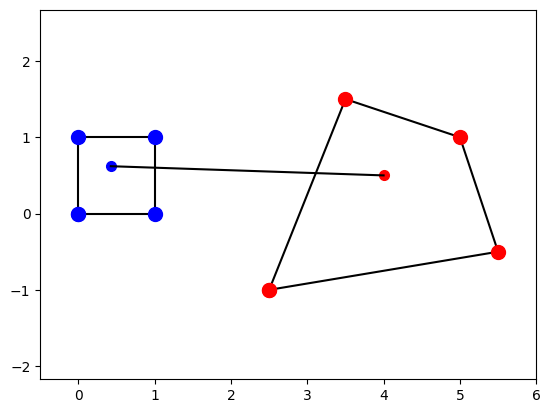

In [18]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots()

axs.plot(vertexsQPlot[:, 0], vertexsQPlot[:, 1], 'o-k', mfc = 'red', mec = 'red', ms = 10)
axs.plot(vertexsRPlot[:, 0], vertexsRPlot[:, 1], 'o-k', mfc = 'blue', mec = 'blue', ms = 10)

axs.plot(v[0], v[1], 'o', mfc = 'red', mec = 'red', ms = 7)
axs.plot(u[0], u[1], 'o', mfc = 'blue', mec = 'blue', ms = 7)

if isInside > 0:
    lineQR = np.array([u, v])
    axs.plot(lineQR[:, 0], lineQR[:, 1], '-', c = 'black')

axs.axis('equal')
axs.set(xlim=(-0.5, 6.0), ylim=(-1.5, 2.0))